# 1. Nhập dữ liệu và thống kê những thông tin cơ bản của các thuộc tính?

In [19]:
# Cài đặt thư viện cần thiết

#linear algebra
import numpy as np

#data processing
import pandas as pd

#data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [20]:
# Đọc dữ liệu đầu vào
with open ('titanic.csv') as f:
    df = pd.read_csv(f, dtype={'age': np.float64, 'sibsp': np.int64, 'parch': np.int64})

In [21]:
# Xem dữ liệu đầu vào
df.head(12)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [22]:
# Thống kê chỉ số của các thuộc tính định lượng
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
# 2. Liệt kê danh sách 5 thuộc tính có số lượng giá trị rỗng nhiều nhất?

In [23]:
# Lấy ra 5 thuộc tính có tổng định lượng cao nhất
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1


In [8]:
# 3. Vẽ biểu đồ khảo sát sự liên quan giữa thuộc tính Độ tuổi (age), Giới tính (sex) và thuộc tính quyết định – khả năng sống sót (survived) và đưa ra nhận xét.

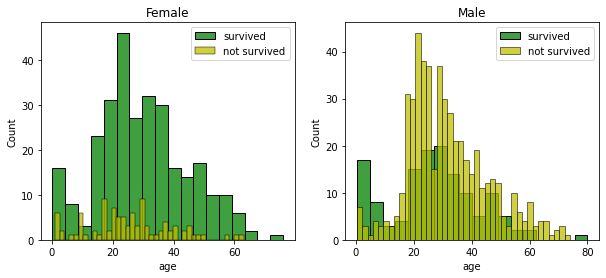

In [24]:
# Xem xét thống kê giữa thuộc tính Độ tuổi (age), Giới tính (sex) và khả năng sống sót (survived)
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women = df[df['sex']=='female']
men = df[df['sex']=='male']
ax = sns.histplot(women[women['survived']==1].age.dropna(),bins=18, label=survived, ax=axes[0], kde=False, color='g')
ax = sns.histplot(women[women['survived']==0].age.dropna(),bins=40, label=not_survived, ax=axes[0], kde=False, color='y')
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['survived']==1].age.dropna(),bins=18, label=survived, ax=axes[1], kde=False, color='g')
ax = sns.histplot(men[men['survived']==0].age.dropna(),bins=40, label=not_survived, ax=axes[1], kde=False, color='y')
ax.legend()
_ = ax.set_title('Male')

In [10]:
# -> Từ biểu đồ trên có thể rút ra vài nhận xét như sau:
# • Xác suất nam sống sót cao ở tuổi từ 1 đến 10
# • Cơ hội sống sót của nữ cao hơn từ 12 đến 40 tuổi
# • Xác suất nam không sống sót cao nhất ở độ tuổi từ 18 đến 27.
# • Nhìn chung tỷ lệ sống sót của nữ ở các lứa tuổi đều có phần nhỉnh hơn nam.

In [11]:
# 4. Vẽ biểu đồ khảo sát sự liên quan giữa thuộc tính Cổng lên tàu (embarked) và loại vé (pclass) với khả năng sống sót (survived), phân biệt theo Giới tính (sex) và đưa ra nhận xét.

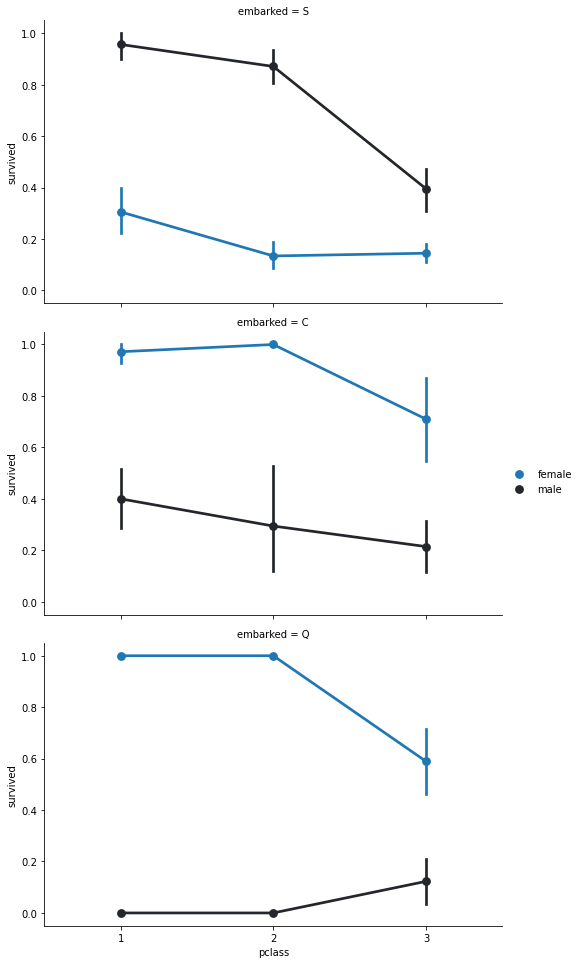

In [25]:
# Xem xét thống kê giữa thuộc tính Cổng lên tàu (embarked) và loại vé (pclass) với khả năng sống sót (survived), phân biệt theo Giới tính (sex).
FacetGrid = sns.FacetGrid(df, row='embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

In [13]:
# -> Từ biểu đồ trên có thể thấy được, thuộc tính Cổng lên tàu có thể liên quan đến khả năng sống sót và phụ thuộc vào giới tính
# Phụ nữ lên tàu ở cổng Q và cổng S có cơ hội sống cao hơn và ngược lại, lên tàu ở cổng C phụ nữ có tỉ lệ chết cao hơn. Đồng nghĩa với tỉ lệ sống sót của đàn ông lên tàu ở cổng C cao hơn so với cổng Q và S.
# Loại vé cũng có thể liên quan đến tỉ lệ sống sót, vì thế, tiếp tục tìm hiểu kỹ hơn về sự phụ thuộc giữa thuộc tính này với thuộc tính quyết định.

<AxesSubplot:xlabel='pclass', ylabel='survived'>

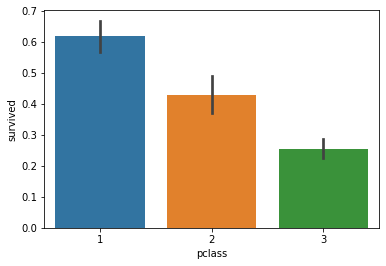

In [27]:
# sự phụ thuộc giữa thuộc tính này với thuộc tính quyết định.
sns.barplot(x='pclass', y='survived', data=df)

In [18]:
# Từ biểu đồ này có thể thấy được rõ ràng tỷ lệ sống sót của loại vé 1 là cao nhất.

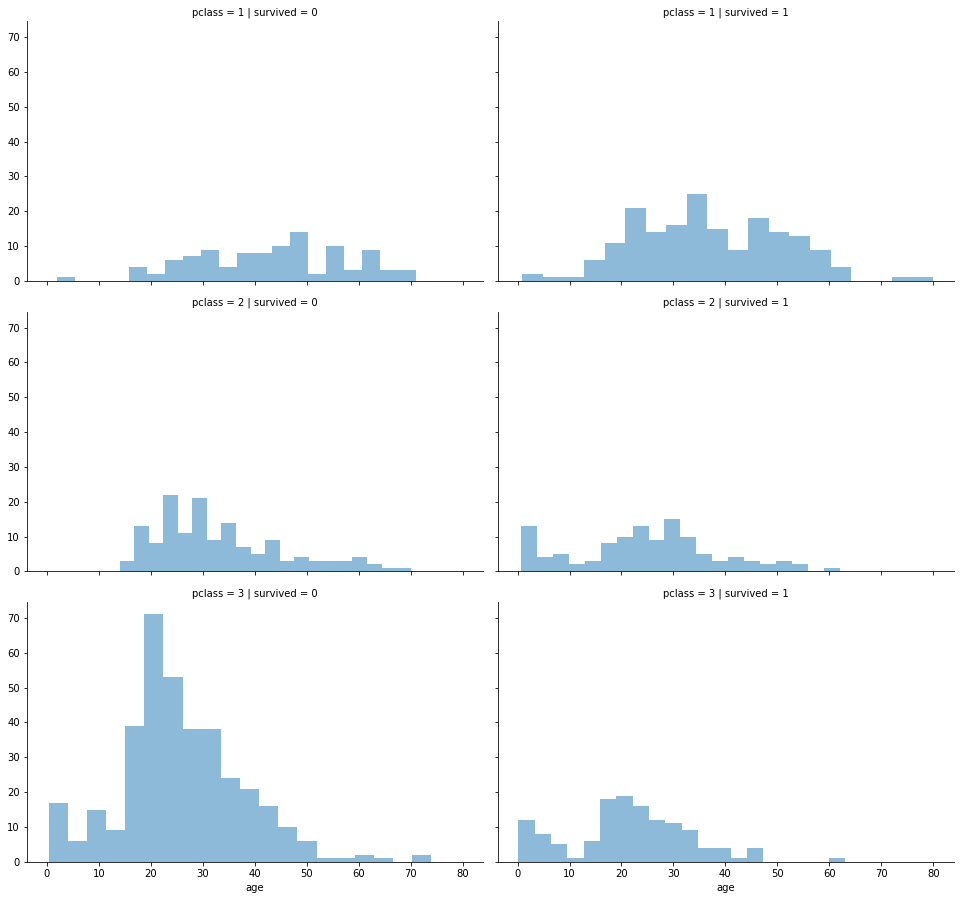

In [16]:
grid = sns.FacetGrid(df, col='survived', row='pclass', height=4.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha =.5, bins=20)
grid.add_legend();

In [17]:
#Từ đồ thị trên có thể xác nhận nhận định bên trên về loại vé 1, và có thể đưa ra thêm nhận định những người có loại vé 3 thì có tỷ lệ không sống sót lớn.

In [18]:
# 5. Thống kê số người đi cùng (anh chị em/vợ chồng hoặc cha mẹ/con cái) và khảo sát sự liên quan với thuộc tính quyết định và đưa ra nhận xét.

In [19]:
# Thống kê số người đi cùng (anh chị em/vợ chồng hoặc cha mẹ/con cái)
for dataset in [df]:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives']>0, 'not_alone']=0
    dataset.loc[dataset['relatives']==0, 'not_alone']=1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

1    790
0    519
Name: not_alone, dtype: int64

In [20]:
# Số người đi một mình là 790 người.
# Số người đi cùng người thân là 519 người.

/Users/trkien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


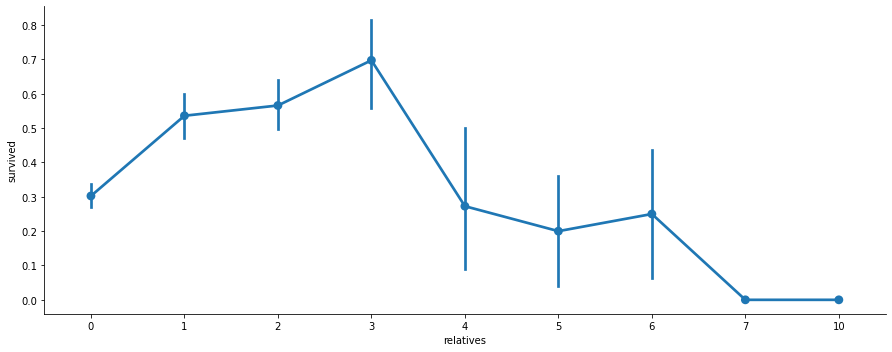

In [21]:
# Biểu đồ biểu diễn mối quan hệ giữa số người đi cùng và khả năng sống sót
axes = sns.catplot('relatives', 'survived',
                      data=df, aspect=2.5, kind='point', )

In [22]:
# -> Sơ đồ trên cho ta thấy, những người có 1 đến 3 người thân đi cùng có tỉ lệ sống sót cao hơn. Những người có 7 đến 10 người thân đi cùng thì có tỉ lệ sống thấp nhất

In [23]:
# 6. Tiền xử lý các thuộc tính thiếu dữ liệu và xóa bỏ các thuộc tính không cần thiết.

In [24]:
# xóa đi các thuộc tính body, cabin, boat, home.dest 
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

for dataset in [df]:
    dataset['cabin'] = dataset['cabin'].fillna("U0")
    dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int)
#we can now drop the cabin feature
df = df.drop(['cabin'], axis=1)

In [25]:
# Xem xét thuộc tính ticket
df['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [26]:
# Thực hiện xóa các thuộc tính không cần thiết.
df = df.drop(['ticket'], axis=1)
df = df.drop(['boat'], axis=1)
df = df.drop(['body'], axis=1)
df = df.drop(['home.dest'], axis=1)

In [27]:
# Điền giá trị còn thiếu vào thuộc tính tuổi (age).
for dataset in [df]:
    mean = df["age"].mean()
    std = df["age"].std()
    is_null = dataset["age"].isnull().sum()
    #compute random numbers between the mea, std and is null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    #fill NaN values in Age column with random values generated
    age_slice = dataset["age"].copy()
    age_slice[np.isnan(age_slice)]= rand_age
    dataset["age"] = age_slice
    dataset["age"] = df["age"].astype(int)
df["age"].isnull().sum()

0

In [28]:
# Điền giá trị còn thiếu vào thuộc tính Cổng lên tàu (embarked).
df['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [29]:
# điền giá trị 'S' (phổ biến nhất) vào các vị trí còn trống.
common_value = 'S'
for dataset in [df]:
    dataset['embarked'] = dataset['embarked'].fillna(common_value)

In [30]:
# 7. Biến đổi các thuộc tính sau:
# • Chuyển đổi thuộc tính giá vé (fare) về kiểu nguyên.
# • Trích xuất thuộc tính danh hiệu (title) từ tên.
# • Chuyển đổi thuộc tính giới tính (sex) và cổng lên tàu (embarked) thành số.
# • Chia giá trị thuộc tính tuổi (age) thành 8 nhóm, sao cho số phần tử trong nhóm cân bằng. 
# • Chia giá trị thuộc tính giá vé (fare) thành 6 nhóm, yêu cầu như trên. 

In [31]:
# Xem lại các thuộc tính 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   int64  
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   fare       1308 non-null   float64
 8   embarked   1309 non-null   object 
 9   relatives  1309 non-null   int64  
 10  not_alone  1309 non-null   int64  
 11  deck       1309 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 122.8+ KB


In [32]:
# Chuyển đổi thuộc tính giá vé (fare) về kiểu số nguyên
for dataset in [df]:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

In [34]:
# Trích xuất danh hiệu (title) từ thuộc tính 'name' để xây dựng thuộc tính mới.
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in [df]:
    #extract titles
    dataset['title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)
    #replace titles with a more common tittle or as Rare
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',\
                                                   'Major', 'Rev', 'Sir', 'Jonkher', 'Dona'], 'Rare')
    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mmme', 'Mrs')
    #convert titles into numbers
    dataset['title'] = dataset['title'].map(titles)
    #filling NaN with 0, to get safe
    dataset['title'] = dataset['title'].fillna(0)
df = df.drop(['name'], axis=1)

In [35]:
# Biểu diễn thuộc tính giới tính (sex) thành các giá trị 0 (nam), 1 (nữ)
genders = {"male": 0, "female": 1}

for dataset in [df]:
    dataset['sex'] = dataset['sex'].map(genders)

In [36]:
# Chuyển đổi thuộc tính cổng lên tàu (embarked) thành số
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in [df]:
    dataset['embarked'] = dataset['embarked'].map(ports)

In [37]:
# Chuyển đổi thuộc tính tuổi (age) về kiểu số nguyên và tạo ra các nhóm tuổi chia giá trị tuổi thành 8 nhóm nhỏ có số lượng hành khách tương đối đều nhau
for dataset in [df]:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[ dataset['age'] <= 11, 'age'] = 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] = 2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] = 3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] = 4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 40), 'age'] = 5
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 66), 'age'] = 6
    dataset.loc[ dataset['age'] > 66, 'age'] = 7  

In [38]:
# Kiểm tra kết quả đạt được
df['age'].value_counts()

6    243
4    223
5    221
3    213
2    167
1    142
0     91
7      9
Name: age, dtype: int64

In [39]:
for dataset in [df]:
    dataset.loc[ dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454),'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31),'fare'] = 2
    dataset.loc[(dataset['fare'] > 31) & (dataset['fare'] <= 99),'fare'] = 3
    dataset.loc[(dataset['fare'] > 99) & (dataset['fare'] <= 250),'fare'] = 4
    dataset.loc[ dataset['fare'] > 250,'fare'] = 5
    dataset['fare'] = dataset['fare'].astype(int)

In [40]:
# 8. Tạo ra các thuộc tính mới:
# • Thuộc tính tuổi * loại vé (age_class): là tích của tuổi và loại vé
# • Thuộc tính giá vé trên mỗi người (fare_per_person): là giá vé chia cho số người đi cùng người đó (có làm trơn + 1)

In [41]:
# Tạo thuộc tính tuổi * loại vé (age_class)
for dataset in [df]:
    dataset['age_class'] = dataset['age'] * dataset['pclass']

In [42]:
# Tạo thuộc tính giá vé trên mỗi người (fare_per_person)
for dataset in [df]:
    dataset ['fare_per_person'] = dataset['fare']/(dataset['relatives']+1)
    dataset ['fare_per_person'] = dataset['fare_per_person'].astype(int)

In [43]:
#let's take a last look at the training set, before we start training the models
df.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck,title,age_class,fare_per_person
0,1,1,1,4,0,0,4,0,0,1,2,2.0,4,4
1,1,1,0,0,1,2,4,0,3,0,3,4.0,0,1
2,1,0,1,0,1,2,4,0,3,0,3,2.0,0,1
3,1,0,0,4,1,2,4,0,3,0,3,1.0,4,1
4,1,0,1,3,1,2,4,0,3,0,3,3.0,3,1
5,1,1,0,6,0,0,2,0,0,1,5,1.0,6,2
6,1,1,1,6,1,0,3,0,1,0,4,2.0,6,1
7,1,0,0,5,0,0,0,0,0,1,1,1.0,5,0
8,1,1,1,6,2,0,3,0,2,0,3,3.0,6,1
9,1,0,0,7,0,0,3,1,0,1,8,1.0,7,3
